# CartPole

Using Deep Q-Learning to play the CartPole Game. Experimenting with Experience Replay which brings down the result.

In [1]:
# -*- coding: utf-8 -*-
import random
import gym
import numpy as np
from collections import deque

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Hyperparameter, max number of episodes
EPISODES = 400

Using TensorFlow backend.


### Main Class for the DQN Agent

In [2]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # experience replay size
        self.gamma = 0.95                # discount rate
        self.epsilon = 1.0               # exploration rate
        self.epsilon_min = 0.0005
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        
        model.add(Dense(48, activation="relu"))
        model.add(Dense(128, activation="relu"))
        model.add(Dense(2, activation="linear"))
        model.summary()
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:   # epsilon greedy action
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):       # Experience replay
        #print('Training replay')
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        #print('End of replay')    

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)




### Main Sampling and Training Loop

In [3]:
if __name__ == "__main__":
    # See domain definition of cartpole here: https://gym.openai.com/envs/CartPole-v0/
    rewardList = []
    env = gym.make('CartPole-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    done = False
    batch_size = 32
    currentAverage = 0
    dividedAverage = 0

    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        for time in range(200):

            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                rewardList.append(time)         
                if(e>100):
                    currentAverage += rewardList[e]
                    currentAverage -= rewardList[e-100]
                    dividedAverage = currentAverage/100
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))
                break
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        if(dividedAverage>=195):
            print('Early stopping at 195')
            break


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 48)                1200      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 98        
Total params: 1,418
Trainable params: 1,418
Non-trainable params: 0
_________________________________________________________________
episode: 0/400, score: 10, e: 1.0
episode: 1/400, score: 21, e: 1.0
episode: 2/400, score: 33, e: 0.85
episode: 3/400, score: 17, e: 0.78
episode: 4/400, score: 16, e: 0.72
episode: 5/400, score: 10, e: 0.68
episode: 6/400, score: 31, e: 0.58
episode: 7/400, score: 9, e: 0.56
episode: 8/400, score: 12, e: 0.53
episode: 9/400, score: 8, e: 0.51
episode: 10/400, score: 12, e: 0.48
episode: 11/400, score

episode: 193/400, score: 106, e: 0.0005
episode: 194/400, score: 199, e: 0.0005
episode: 195/400, score: 120, e: 0.0005
episode: 196/400, score: 131, e: 0.0005
episode: 197/400, score: 101, e: 0.0005
episode: 198/400, score: 199, e: 0.0005
episode: 199/400, score: 147, e: 0.0005
episode: 200/400, score: 122, e: 0.0005
episode: 201/400, score: 199, e: 0.0005
episode: 202/400, score: 199, e: 0.0005
episode: 203/400, score: 131, e: 0.0005
episode: 204/400, score: 109, e: 0.0005
episode: 205/400, score: 133, e: 0.0005
episode: 206/400, score: 199, e: 0.0005
episode: 207/400, score: 123, e: 0.0005
episode: 208/400, score: 74, e: 0.0005
episode: 209/400, score: 28, e: 0.0005
episode: 210/400, score: 9, e: 0.0005
episode: 211/400, score: 117, e: 0.0005
episode: 212/400, score: 156, e: 0.0005
episode: 213/400, score: 91, e: 0.0005
episode: 214/400, score: 125, e: 0.0005
episode: 215/400, score: 117, e: 0.0005
episode: 216/400, score: 103, e: 0.0005
episode: 217/400, score: 108, e: 0.0005
episo

# Plot the average for last 100 episodes

Average score over all episodes:  108.8575
Average score the last 100 episodes:  89.34


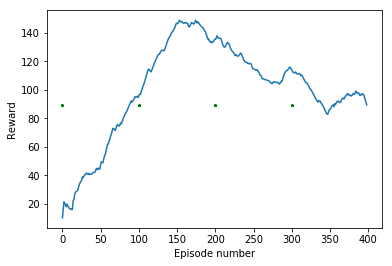

In [4]:
# Printing Numbers
currentAverage = 0
dividedAverage = 0
totalAverage = sum(rewardList)/len(rewardList)
newList = [] #Used to plot average over last 100s

#To calculate average over first 100 Numbers
for i in range(100):
    currentAverage += rewardList[i]
    dividedAverage = currentAverage/(i+1) 
    newList.append(dividedAverage)

#For the rest of the numbers, calculate average with last 100 numbers
for i in range(100, len(rewardList)-1):
    currentAverage += rewardList[i]
    currentAverage -= rewardList[i-100]
    dividedAverage = currentAverage/100 
    newList.append(dividedAverage) 

#Plotting the list    
plt.plot(newList) 

#Plotting the average of the last 100
plotting = int(EPISODES/100)
for i in range(plotting):
    plt.plot(100*i,dividedAverage, color='green', marker='*', linestyle='dashed', linewidth=2, markersize=3) 
    
print("Average score over all episodes: ", totalAverage)
print("Average score the last 100 episodes: ", dividedAverage)

plt.ylabel('Reward')
plt.xlabel('Episode number')

plt.show()